<a href="https://colab.research.google.com/github/VIKASRAJPUT10/vikas/blob/main/Rice_classification_by_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <p><center style="font-family:camtasia;font-size:180%;">Rice Classification by Tensorflow</center></p>

**<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Introduction Of Dataset</p>

## Five different Rice Image: Arborio, Basmati, Ipsala, Jasmine, Karacadag
The dataset has 75K images including 15K pieces from each rice variety.<br>
Rice, which is among the most widely produced grain products worldwide, has many genetic varieties. These varieties are separated from each other due to some of their features. These are usually features such as texture, shape, and color. With these features that distinguish rice varieties, it is possible to classify and evaluate the quality of seeds. In this study, Arborio, Basmati, Ipsala, Jasmine, and Karacadag, which are five different varieties of rice often grown in Turkey, were used.

For more information about the dataset use the following Kaggle link:<br>
https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset

<a id="2"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Import Libraries </p>

In [ ]:
# import requirement libraries and tools
import os
from tensorflow import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "darkgrid", color_codes = True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d muratkokludataset/rice-image-dataset

 99% 217M/219M [00:07<00:00, 31.1MB/s]
100% 219M/219M [00:07<00:00, 29.8MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/rice-image-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

<a id="2"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Create a dataframe with the Images and Label </p>

In [ ]:
# Set the path to the dataset
dataset_path = '/content/Rice_Image_Dataset'

# Initialize empty lists for storing the images and labels
images = []
labels = []

# Loop over the subfolders in the dataset
for subfolder in os.listdir(dataset_path):

    subfolder_path = os.path.join(dataset_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue

  # Loop over the images in the subfolder
    for image_filename in os.listdir(subfolder_path):
       # Load the image and store it in the images list
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)

        # Store the label for the image in the labels list
        labels.append(subfolder)

 # Create a pandas DataFrame from the images and labels
df = pd.DataFrame({'image': images, 'label': labels})

# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Visualization of Dataset </p>

In [ ]:
df.head()

,image,label
0,/content/Rice_Image_Dataset/Basmati/basmati (9...,Basmati
1,/content/Rice_Image_Dataset/Basmati/basmati (1...,Basmati
2,/content/Rice_Image_Dataset/Basmati/basmati (1...,Basmati
3,/content/Rice_Image_Dataset/Basmati/basmati (5...,Basmati
4,/content/Rice_Image_Dataset/Basmati/basmati (3...,Basmati


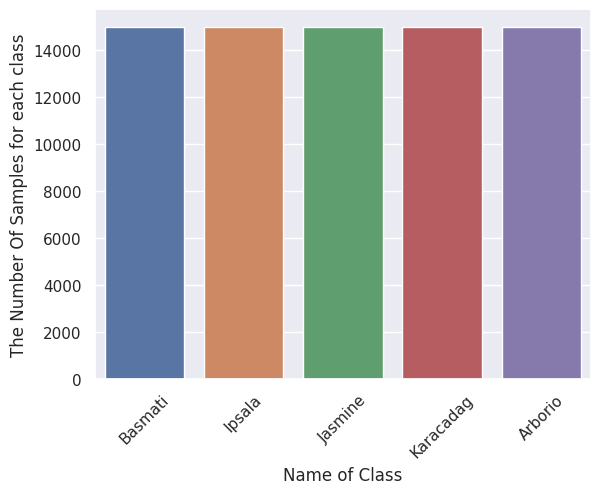

In [ ]:
# plot the classes
ax = sns.countplot(x=df.label)

# Set labels and titles
ax.set_xlabel("Name of Class")
ax.set_ylabel("The Number Of Samples for each class")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

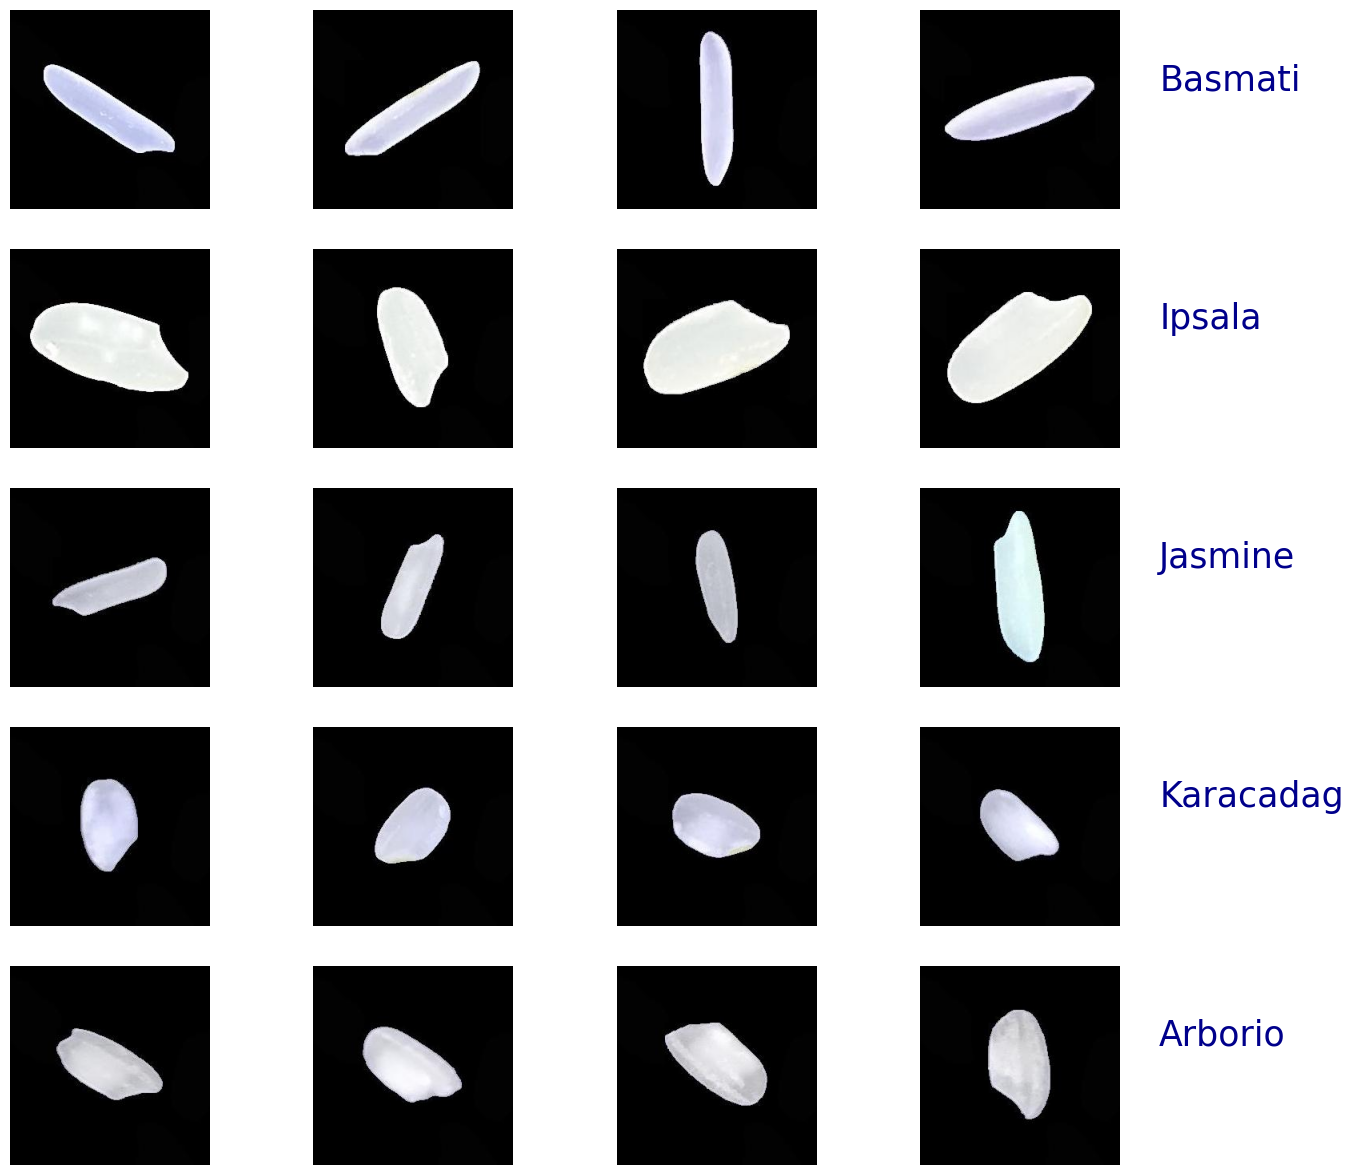

In [ ]:
from matplotlib.gridspec import GridSpec
# Create figure and grid of subplots
fig = plt.figure(figsize=(15, 15))
gs = GridSpec(5, 4, figure=fig)

# Loop through each unique category in the DataFrame
for i, category in enumerate(df['label'].unique()):
    # Get the filepaths for the first four images in the category
    filepaths = df[df['label'] == category]['image'].values[:4]

    # Loop through the filepaths and add an image to each subplot
    for j, filepath in enumerate(filepaths):
        ax = fig.add_subplot(gs[i, j])
        ax.imshow(plt.imread(filepath))
        ax.axis('off')

    # Add a label to the bottom of the subplot grid
    ax.text(300, 100, category, fontsize=25, color='darkblue')

plt.show()

<a id="2"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Split Data into Train and Test </p>

I divided our data into two separate datasets: the training dataset and the testing dataset. The training dataset consists of 80% of the data, while the testing dataset contains the remaining 20%.

To facilitate the training process, I applied the LabelEncoder to labels. This process allowed us to convert the rice types' labels, namely 'Arborio', 'Basmati', 'Ipsala', 'Jasmine', and 'Karacadag', into numerical values. By assigning integer values to the labels, we enabled the utilization of these labels as target variables during the training of our machine learning model.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['image'], df['label'], test_size=0.2, random_state=42)

# Create a dataframe for the training data
df_train = pd.DataFrame({'image': X_train, 'label': y_train})

# Create a dataframe for the test data
df_test = pd.DataFrame({'image': X_test, 'label': y_test})

# Encode the labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

<a id="2"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Data Augmentation </p>

To streamline the preprocessing of our images, we took the following steps. First, we created generators for both the training and testing datasets. These generators allow us to efficiently handle and manipulate the data during the training and testing phases.

Moreover, to enhance the diversity and robustness of our training data, we applied data augmentation techniques specifically to the training dataset. This augmentation process introduces variations in the images by applying transformations such as rotation, scaling, and flipping. By doing so, we expand the dataset and enable our model to learn from a wider range of image variations.

Additionally, we standardized the image dimensions by reshaping them to a uniform size of 50x50 pixels. This resizing ensures that all images in the dataset have consistent dimensions, facilitating the subsequent processing and analysis stages.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
# Set the image size and batch size
image_size = (50, 50)
batch_size = 32

# Create an ImageDataGenerator object with data augmentation options for image preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Create a generator for the training data
train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Create a generator for the test data
test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 60000 validated image filenames belonging to 5 classes.
Found 15000 validated image filenames belonging to 5 classes.


<a id="2"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Modeling </p>

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# Set the input shape for the model
input_shape = (50, 50, 3)

# Create a Sequential model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model on the training data
history = model.fit_generator(train_generator,epochs=10,validation_data=test_generator)

Epoch 1/10
1875/1875 [==============================] - 155s 82ms/step - loss: 0.1376 - accuracy: 0.9498 - val_loss: 0.0755 - val_accuracy: 0.9745
Epoch 2/10
1875/1875 [==============================] - 148s 79ms/step - loss: 0.0978 - accuracy: 0.9645 - val_loss: 0.1171 - val_accuracy: 0.9566
Epoch 3/10
1875/1875 [==============================] - 148s 79ms/step - loss: 0.0811 - accuracy: 0.9705 - val_loss: 0.1513 - val_accuracy: 0.9463
Epoch 4/10
1875/1875 [==============================] - 145s 77ms/step - loss: 0.0696 - accuracy: 0.9762 - val_loss: 0.0757 - val_accuracy: 0.9732
Epoch 5/10
1875/1875 [==============================] - 170s 91ms/step - loss: 0.0661 - accuracy: 0.9768 - val_loss: 0.0420 - val_accuracy: 0.9861
Epoch 6/10
1875/1875 [==============================] - 160s 86ms/step - loss: 0.0539 - accuracy: 0.9813 - val_loss: 0.0382 - val_accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 158s 84ms/step - loss: 0.0477 - accuracy: 0.9833 - val_loss: 0

<a id="2"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Evaluate The Model  </p>

Text(0.5, 1.0, 'Accuracy comparison between Validation and Train Data set')

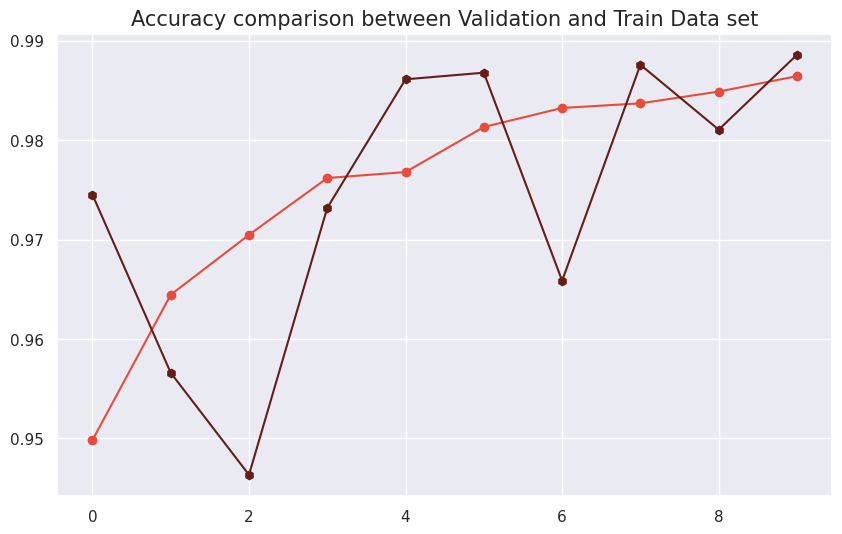

In [ ]:
# Replace 'history['accuracy']' with 'history.history['accuracy']'
# Replace 'history['val_accuracy']' with 'history.history['val_accuracy']'

plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], color="#E74C3C", marker='o')
plt.plot(history.history['val_accuracy'], color='#641E16', marker='h')
plt.title('Accuracy comparison between Validation and Train Data set', fontsize=15)

Text(0.5, 1.0, 'Loss comparison between Validation and Train Data set')

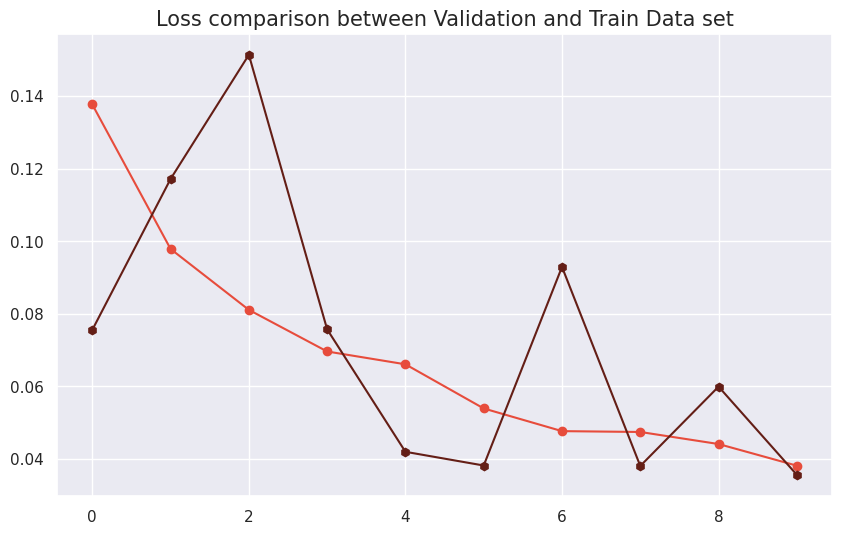

In [ ]:
# Replace 'history['loss']' with 'history.history['loss']'
# Replace 'history['val_loss']' with 'history.history['val_loss']'

plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], color="#E74C3C", marker='o')
plt.plot(history.history['val_loss'], color='#641E16', marker='h')
plt.title('Loss comparison between Validation and Train Data set', fontsize=15)


In [ ]:
# Evaluate the model on the test data
metrics = model.evaluate(test_generator)
# Print the accuracy of the model
print('Accuracy:', metrics[1])

469/469 [==============================] - 31s 67ms/step - loss: 0.0341 - accuracy: 0.9881
Accuracy: 0.9880666732788086


<a id="2"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Save Model  </p>

In [ ]:
# Save the model
model.save('CNN_model.h5')
print ("Model saved successfully!")

Model saved successfully!
